# Analytics Labs

## Lab 1 - Mastermind entropy

DS 1001 - Spring 2023 - Professors Wright and Alonzi

Due: End of lab period (or later that day)

Submission format: Word doc or PDF summarizing your findings

Individual Assignment

**General Descripition:** This lab is designed to introduce the basic concepts behind information gain and entropy. Mastermind is a game were through a series of questions one player tries to determine a "code" created by another player. In doing so the value of asking questions that provide a high level of information will become paramount.

Preparatory Assignments - None

**Why am I doing this?** In order to gain a better understanding of information gain and entropy through hands on experience.

**What am I going to do?** Work with a partner or group of three and alternate playing the game. At the onset of each game the code-maker should calculate the entropy of the chosen pegs for the "code". The code-breaker should note the results of the game . This should include whether the code was broken or not and the number of rounds used. Try to be the code-maker and breaker at least 3 times. The code-maker should intentionally use very different types of "code", this should impact how the game is played.

-   Note the range of entropy for binary cases is 0 to 1 for more than 2 classes it is 0 to log~2~ *k*, where *k* is the number of classes.

**Answer these questions:**

1.  What combinations of pegs (code) seemed to be harder to break?
2.  Did your approach to asking questions change as you played?
3.  Describe where in the game information gain is being presented?

Tips for success:

-   Don't worry about winning, instead think about what is happening during game play.
-   Work as a team with your group.
-   Try to document the process used right at the start of the lab, don't wait till after you have played to start taking notes.

How will I know I have succeeded:

| Specs Category |                                                                 Specs Detail                                                                  |
|:----------------------------------:|:----------------------------------:|
|   Submission   |                                                   Submit via Canvas a PDF or Word Document                                                    |
|      Text      | \* Answer the above questions<br> \* When you were the code-maker submit the Entropy<br> \* When you were the code-breaker submit the results |

Acknowledgements: Special thanks for Jess Taggart from UVA CTE for coaching us. This structure is pulled directory from Steifer & Palmer (2020).

## Lab 2 - Old Faithful

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UVADS/DS1001/blob/master/ddsbook/analytics-lab-II.qmd) 


In [1]:
# pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm


## What we are going to do is add guassian noise itertatively to a dataset and then pass the new noisy dataset to a pretrained machine linear model and track the ability of the model to learn the target as noise increases. 

1. Read this brief article on garbage in garbage out and this brief article on guassian noise. 

2. Answer the questions below as they relate to model output and the articles. 


In [2]:
# This is the dataset we will be using: classic eruption times for old faithful. 
# Take a look at the documentation 
# here: https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/faithful


# This is our data source
url="https://gist.githubusercontent.com/curran/4b59d1046d9e66f2787780ad51a1cd87/raw/9ec906b78a98cf300947a37b56cfe70d01183200/data.tsv"


# Reading in the data, and use the "tab" as a separator so the data will be loaded 
# in correctly.  pd stands for pandas and "pd.read_csv" is the function we are 
# using to read in the data from the url.
old_faith = pd.read_csv(url, sep='\t')

## Let's take a quick look at a plot to get an idea of the distribution of the data. 


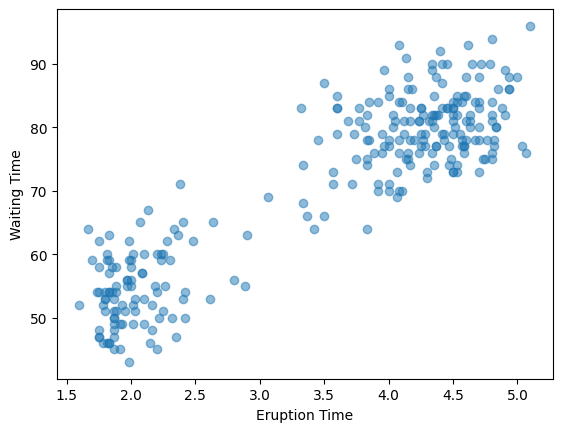

In [3]:
plt.scatter(old_faith.eruptions, old_faith.waiting, alpha=0.5)
plt.xlabel("Eruption Time")
plt.ylabel("Waiting Time")

plt.show()

# Note the patterns that you see, (you'll need this for your submission) 

## Next lets build a simple model to predict Eruption Length based on Waiting Time 


In [4]:
lm = sm.OLS(old_faith['waiting'],old_faith['eruptions']).fit()

lm.summary()

#Using the R2 measure, how well does the model predict (scale of 0 to 1,
#  where 1 is perfect, again needed for your submission)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                waiting   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              9621.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):                   9.97e-214
Time:                        10:45:35   Log-Likelihood:                         -1060.7
No. Observations:                 272   AIC:                                      2123.
Df Residuals:                     271   BIC:                                      2127.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
eruptions     19.4019      0.198     98.086      0.000      19.013      19.791
==============================================================================
Omnibus:                       31.065   Durbin-Watson:                   2.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.019
Skew:                           0.148   Prob(JB):                      0.00667
Kurtosis:                       2.108   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Now what we are going to do is add "noise" to the dataset and then rerun the model and see what happens.

In [5]:
# mu= mean and sigma =standard deviation
mu, sigma = 0, .5 
# creating a noise with the same dimension as the dataset (2,2) 
noise = np.random.normal(mu, sigma, [272,2]) 
print(noise[0:5])

[[ 0.36560439  0.49073935]
 [ 0.20743718 -0.1919574 ]
 [ 0.30681528 -0.0190162 ]
 [-0.14527308  0.41817492]
 [ 0.75842863  0.3550967 ]]


## Really a small change, let's see what happens to the model quality

In [6]:
# Here we are adding the noise to the dataset
old_faith_1=old_faith + noise

#Create a new model
lm_1 = sm.OLS(old_faith_1['waiting'],old_faith_1['eruptions']).fit()

#Checking the R2 number
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                waiting   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              5567.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):                   1.09e-182
Time:                        10:45:35   Log-Likelihood:                         -1132.7
No. Observations:                 272   AIC:                                      2267.
Df Residuals:                     271   BIC:                                      2271.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
eruptions     18.6698      0.250     74.611      0.000      18.177      19.162
==============================================================================
Omnibus:                        0.091   Durbin-Watson:                   2.275
Prob(Omnibus):                  0.955   Jarque-Bera (JB):                0.206
Skew:                           0.022   Prob(JB):                        0.902
Kurtosis:                       2.872   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Now let's take a look at that same scatter plot but with the new data

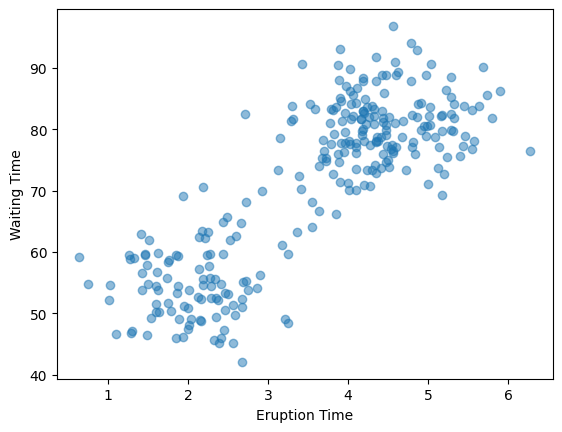

In [7]:
plt.scatter(old_faith_1.eruptions, old_faith_1.waiting, alpha=0.5)
plt.xlabel("Eruption Time")
plt.ylabel("Waiting Time")

plt.show()

### Task 1: Slowly change the standard deviation (increases of .25) and see what happens with the R2 number, note the pace of change of the model.  

### Task 2: Adjust the mean but leave the standard dev low, note how this effects the model.  

## Questions for submission: 

1. What patterns do you see in the data?

2. How well did the first model fit the data? 

3. Explain the concept behind noise versus signal as it relates to example today on the old faithful dataset.  

4. Define the term gaussian noise and explain the observations you noted as it relates to 
